In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

In [2]:
df1 = pd.read_csv('passes.csv')
df2 = pd.read_csv('take_ons.csv')
df3 = pd.read_csv('shots.csv')
df4 = pd.read_csv('def_actions.csv')

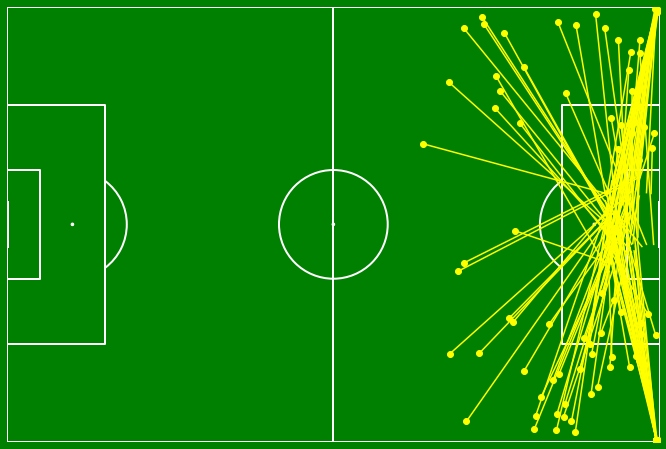

In [3]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df1['x_start'])):
    if df1['xT'][x] > 0.15:
        if df1['outcome'][x] == 1:
            plt.plot((df1['x_start'][x],df1['x_end'][x]),(df1['y_start'][x],df1['y_end'][x]),color='yellow')
            plt.scatter(df1['x_start'][x],df1['y_start'][x],color='yellow')

plt.xlim(0,120)
plt.ylim(0,80);

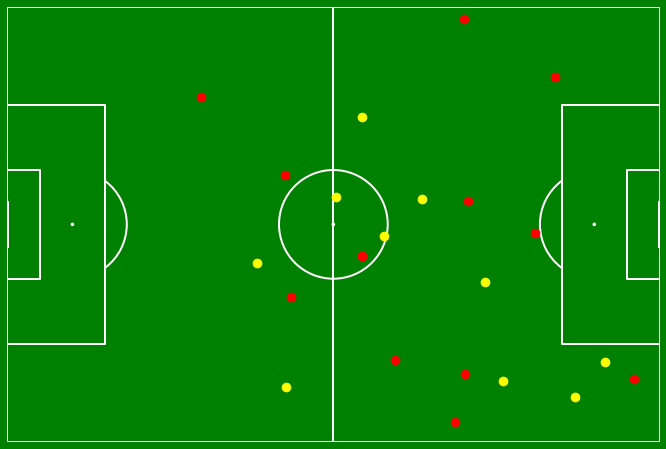

In [4]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df2['x_start'])):
    if df2['team'][x] == 'Argentina':
        if df2['game'][x] == 'Germany vs Argentina':
            if df2['outcome'][x] == 1:
                plt.scatter(df2['x_start'][x],df2['y_start'][x],color='yellow',marker='.',s=300)
            else:
                plt.scatter(df2['x_start'][x],df2['y_start'][x],color='red',marker='.',s=300)                

plt.xlim(0,120)
plt.ylim(0,80);

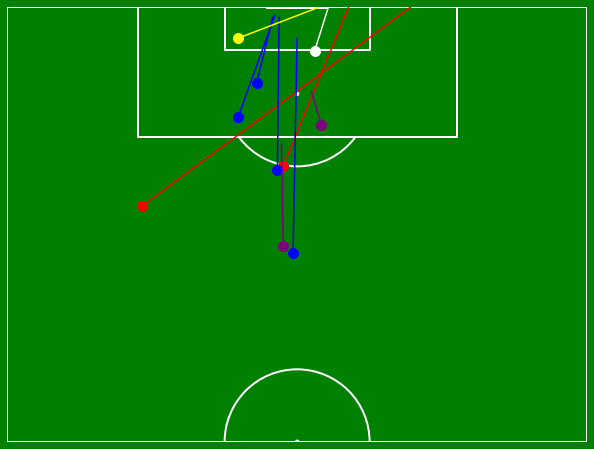

In [5]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False, half=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df3['x_start'])):
    if df3['team'][x] == 'Germany':
        if df3['game'][x] == 'Germany vs Argentina':
            if df3['outcome'][x] == 'Goal':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='yellow',s=100)
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='yellow')
            elif df3['outcome'][x] == 'Miss':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='red',s=100)  
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='red')
            elif df3['outcome'][x] == 'Save':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='blue',s=100) 
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='blue')    
            elif df3['outcome'][x] == 'Block':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='purple',s=100) 
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='purple')                 
            elif df3['outcome'][x] == 'Woodwork':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='white',s=100)
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='white')
                
plt.xlim(80,0)
plt.ylim(60,120);

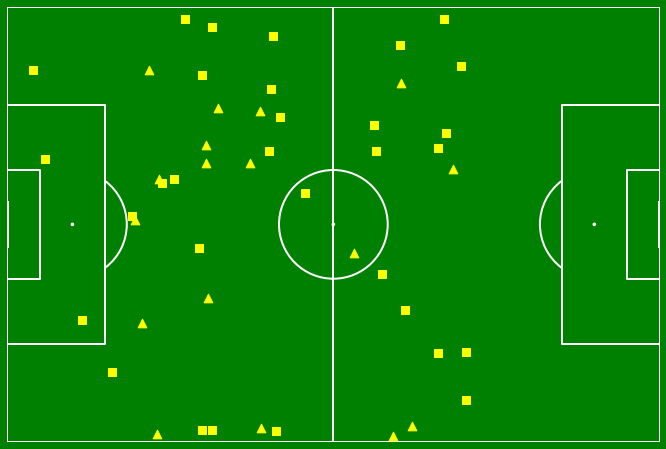

In [6]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df4['x_start'])):
    if df4['team'][x] == 'Germany':
        if df4['game'][x] == 'Germany vs Argentina':
            if df4['type_def'][x] == 'Tackle':
                plt.scatter(df4['x_start'][x],df4['y_start'][x],color='yellow',marker='s',s=75)
            elif df4['type_def'][x] == 'Interception':
                plt.scatter(df4['x_start'][x],df4['y_start'][x],color='yellow',marker='^',s=75)                

plt.xlim(0,120)
plt.ylim(0,80);